In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras import backend as K 
from keras.layers import BatchNormalization, Dense, Input, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("heart.csv")

# Heart Attack Prediction Dataset <br>
<a href="https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset"> Dataset comes from kaggle </a>

### The dataset has 14 columns:
0.  age - Age of the person
1.  sex - Gender of the person (0 = female; 1 = male)
2.  cp - Chest Pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)
3.  trtbps - resting blood pressure in mm/Hg
4.  chol - cholestoral in mg/dl
5.  fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
6.  restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable ventricular hypertrophy)
7.  thalachh - maximum heart rate achieved
8.  exng - exercise induced angina (1 = yes; 0 = no)
9.  oldpeak - ST depression induced by exercise relative to rest
10.  slp - the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)
11.  caa - number of major vessels (0-3)
12.  thall - Thallium Stress Test result
13.  output - Target variable (0 = no heart attack; 1 = heart attack)

## The dataframe

In [2]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Information about the datatype of the features

-  no null values
-  only one feature is float

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Statistics

### type of features

In this dataset there are 2 types of features -> categorical and continuos
-  categorical: only take discrete values
-  continuos: they can take infinite values

In [4]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
continous = ['age', 'trtbps', 'chol','thalachh', 'oldpeak']

### Statistics of the continuos features

In [5]:
data[continous].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### Distribution of the continuos features

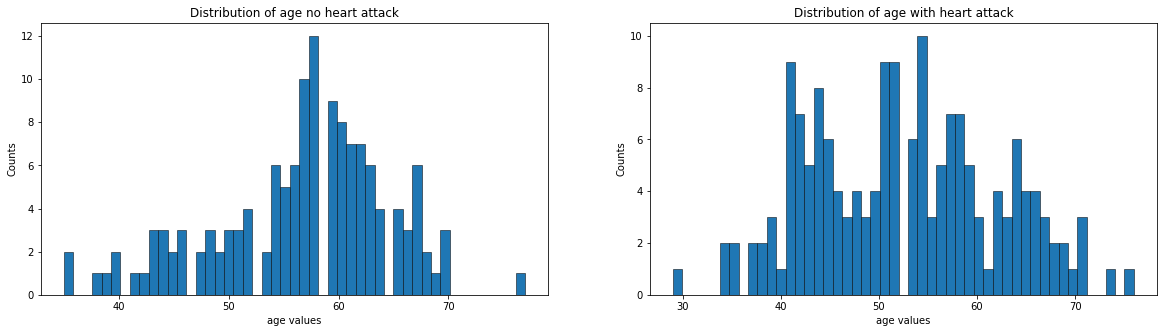

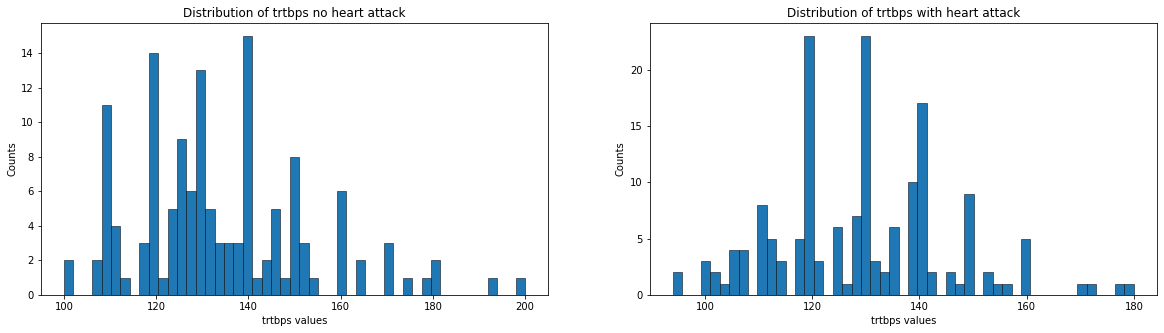

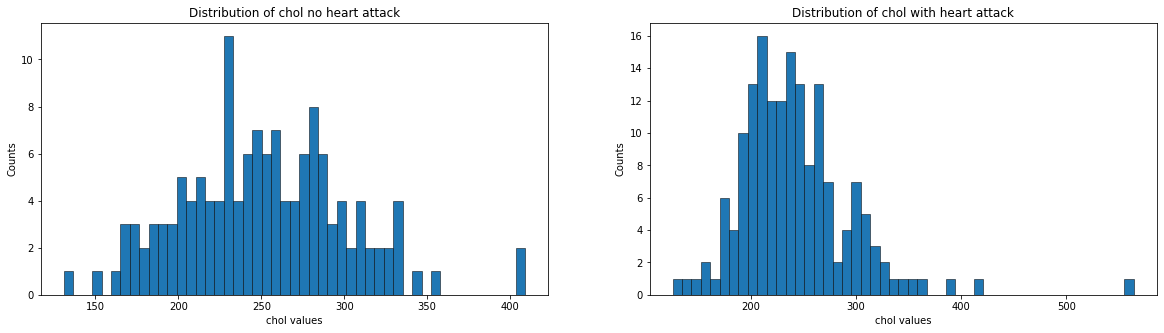

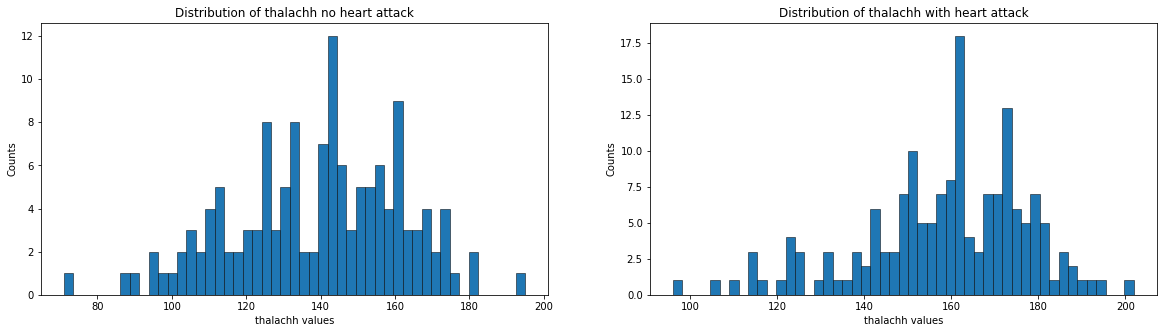

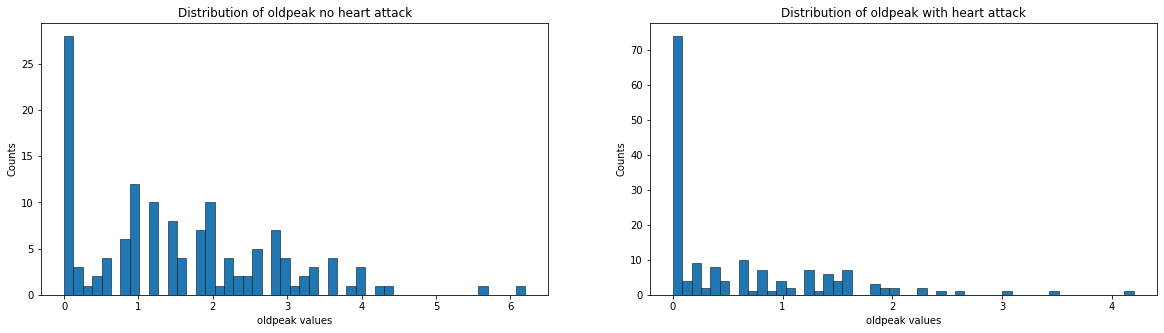

In [6]:
for i, feature in enumerate(continous):
    plt.figure(i, figsize=(20, 5))
    plt.subplot(1, 2, 1)
    feature_data = data.loc[(data.output == 0)][feature]
    plt.hist(feature_data, bins=np.linspace(np.min(feature_data), np.max(feature_data), 50), edgecolor="black", linewidth=0.5)
    plt.title("Distribution of " +  feature + " no heart attack")
    plt.ylabel("Counts")
    plt.xlabel(feature + " values")
    plt.subplot(1, 2, 2)
    feature_data_1 = data.loc[(data.output == 1)][feature]
    plt.hist(feature_data_1, bins=np.linspace(np.min(feature_data_1), np.max(feature_data_1), 50), edgecolor="black", linewidth=0.5)
    plt.title("Distribution of " +  feature + " with heart attack")
    plt.ylabel("Counts")
    plt.xlabel(feature + " values")
    plt.show()

### Conclusions

1. People tend to have heart attacks around age 50
2. People with lower cholesterol are more likely to get a hear attack

### Statistics of the categorical features

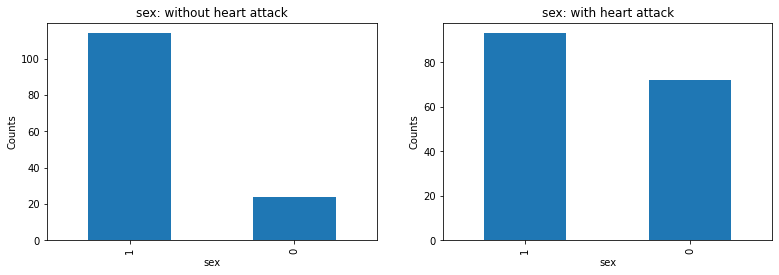

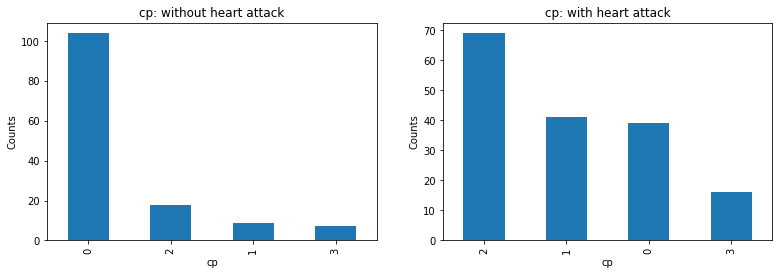

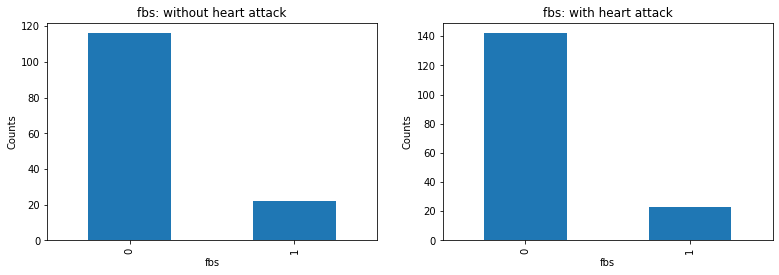

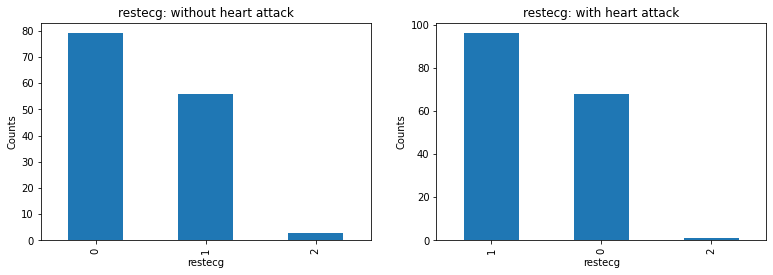

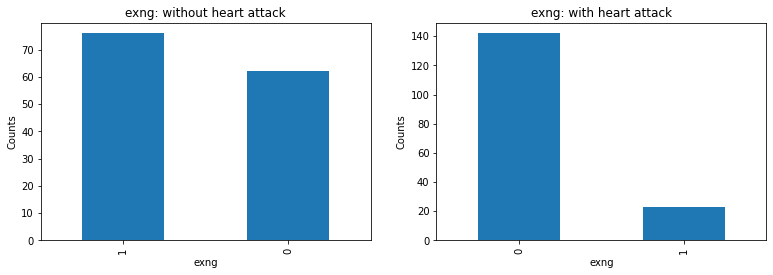

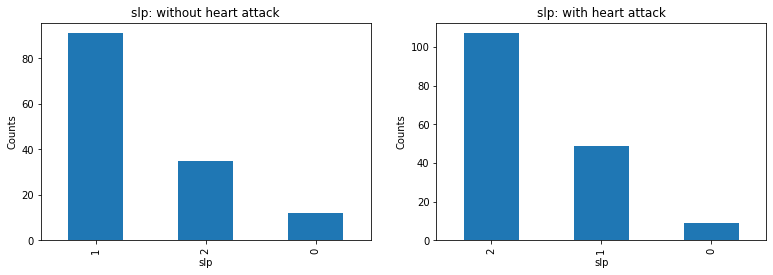

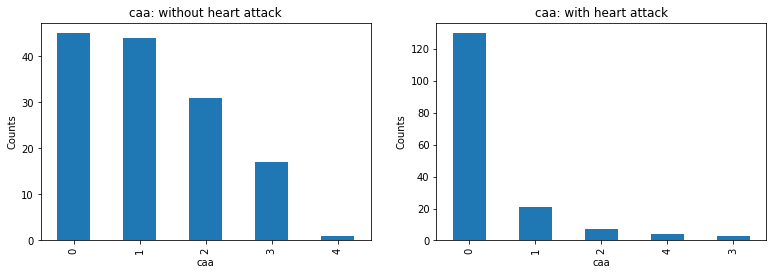

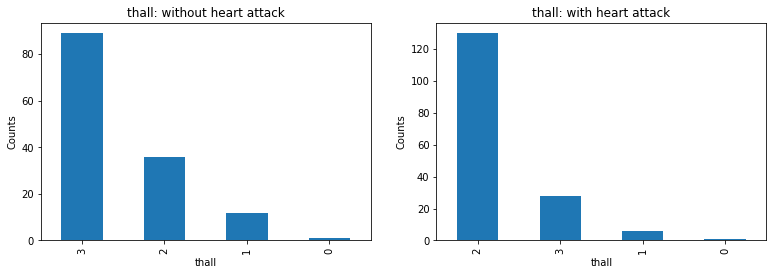

In [7]:
for i, feature in enumerate(categorical):
    plt.figure(i, figsize=(13, 4))
    plt.subplot(1, 2, 1)
    feature_data = data.loc[(data.output == 0)][feature].value_counts()
    feature_data.plot(kind='bar',label=feature,xlabel=feature,ylabel='Counts')
    plt.title(feature + ": without heart attack")
    plt.subplot(1, 2, 2)
    feature_data = data.loc[(data.output == 1)][feature].value_counts()
    feature_data.plot(kind='bar',label=feature,xlabel=feature,ylabel='Counts')
    plt.title(feature + ": with heart attack")
    plt.show()

### Conclusions

1. Male (sex = 1 ) has higher chance of heart attack
2. People with non-anginal pain (cp = 2 ) have higher chances of heart attack
3. People with having ST-T wave abnormality (restecg = 1 ) have higher chance of heart attack
4. People with no exercise induced angina (exng = 0 ) have higher chance of heart attack
5. People with the downslope of the peak exercise ST segment (slp = 2 ) have higher chance of heart attack
6. People with 0 major vessels have a higher chance of heart attack
7. People with thall = 2 have higher chance of heart attack

# Training the model

### Target variable 

In [8]:
data.groupby("output").output.count().reset_index(name="nº of heart attacks").rename(index={0:"no heart attack",1:"heart attack"})

,output,nº of heart attacks
no heart attack,0,138
heart attack,1,165


### Separating the data
*  X will have the features and the respective values <br>
*  y will have the target values that we want to predict <br>

In [9]:
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
target = 'output'
X = data[features].values
y = data[target].values

### Normalization of the features values
some columns like trtbps, chol and thalachh have large values. The NN model will benefit from the normalization of the values

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Separating the training and testing data

opted for a 0.7/0.3 particion on this dataset wich means that 212 entrys will be for the training and 91 for testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

### The arquitecture of the model
-  There are 13 features being used wich means the input layer will have 13 neurons
-  Dropout layer: it is used to avoid overfitting. It randomly sets input units to 0 with a frequency of p, at each step during training time
-  2 hidden Dense layers, one with 7 and the other 4 neurons: this layer implments, in this case, the operation $output = relu(w \cdot x + bias)$ where $w$ are the weights and $x$ the input of that layer
-  output layer with only one neuron, another dense layer that uses the sigmoid function to squeeze the output values between 0 and 1
<br>
![model](network.jpg)

In [20]:
def get_model(number_of_features, number_of_outputs, p=0.2):
    inputs = Input(shape=(number_of_features,))
    l = Dropout(p)(inputs)
    l = Dense(7, activation='relu')(l)
    l = Dropout(p)(l)
    l = Dense(4, activation='relu')(l)
    outputs = Dense(number_of_outputs, activation='sigmoid')(l)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = get_model(len(features), 1)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 98        
_________________________________________________________________
dropout_5 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 135
Trainable params: 135
Non-trainable params: 0
_____________________________________________________________

### history of the training

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=3, callbacks=[EarlyStopping(patience=5)])

Epoch 1/100
71/71 [==============================] - 1s 4ms/step - loss: 0.7470 - accuracy: 0.5735 - val_loss: 0.6505 - val_accuracy: 0.6154
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5525 - accuracy: 0.6576 - val_loss: 0.6128 - val_accuracy: 0.6264
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.7097 - val_loss: 0.5910 - val_accuracy: 0.6484
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.6073 - val_loss: 0.5696 - val_accuracy: 0.7143
Epoch 5/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.6704 - val_loss: 0.5497 - val_accuracy: 0.7363
Epoch 6/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5510 - accuracy: 0.7334 - val_loss: 0.5351 - val_accuracy: 0.7582
Epoch 7/100
71/71 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.6444 - val_loss: 0.5260 - val_accuracy: 0.7912
Epoch 8/100
7

## Accuracy and loss

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("the test loss was {0:.2f} with an accuracy of {1:.1f}%".format(test_loss, test_acc * 100))

the test loss was 0.35 with an accuracy of 86.8%


### graphs of accuracy and loss

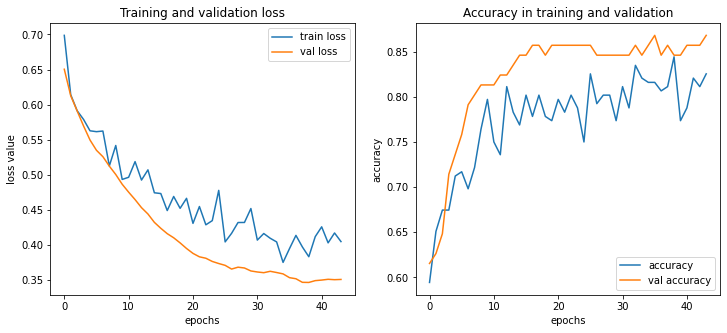

In [23]:
history_df = pd.DataFrame(history.history)
plt.figure(0, figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history_df.loss,label="train loss")
plt.plot(history_df.val_loss,label="val loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.legend(loc="best")
plt.subplot(1, 2, 2)
plt.plot(history_df.accuracy,label="accuracy")
plt.plot(history_df.val_accuracy,label="val accuracy")
plt.title("Accuracy in training and validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.show()